<a href="https://colab.research.google.com/github/Praewphat/AIPrototype2023/blob/main/Association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Asso

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.8998,256.67,91.0,5.559,215.0,81.0,123.0,99.0,65.810,1
1,1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.6377,260.39,86.0,5.489,219.0,64.0,146.0,73.0,105.881,1
2,2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,...,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,51.688,1
3,3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,...,4.9215,206.32,89.0,5.414,205.0,69.0,139.0,76.0,20.270,1
4,4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,47.001,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation',
       'StartDTTM', 'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
  

In [ ]:
df.shape

(52620, 83)

In [ ]:
selected_columns = ['InPatient', 'OutPatient', 'Emergency','VisitLocation', 'NATNL',
'Slopes', 'eGFR_t1',  'Sex', 'Age', 'BMI','BSA', 'Diastolic-BP', 'Systolic-BP',
'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio',
'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']
df_selected = df[selected_columns]

In [ ]:
df_selected.shape

(52620, 75)

In [ ]:
df_selected.describe()

,InPatient,OutPatient,Emergency,NATNL,Slopes,eGFR_t1,Sex,Age,BMI,BSA,...,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.088027,0.868890,0.043082,0.013816,-2.169255,53.188739,0.479932,66.812828,32.616257,1.695886,...,0.002471,0.007982,0.009977,0.014994,0.005530,0.001558,0.020334,0.008837,0.043843,0.013208
std,0.283337,0.337524,0.203045,0.168555,9.785498,16.696552,0.499602,11.646585,835.794426,1.078782,...,0.049644,0.089410,0.099387,0.122621,0.075431,0.039445,0.144075,0.094197,0.209699,0.114664
min,0.000000,0.000000,0.000000,0.000000,-79.002653,1.300000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,-6.381052,43.810000,0.000000,60.000000,22.860000,1.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,-1.706494,54.660000,0.000000,67.000000,25.530000,1.689500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,2.488436,63.220000,1.000000,75.000000,28.198275,1.795125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,106.892857,142.900000,1.000000,102.000000,186879.990000,166.260000,...,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000


In [ ]:
df_selected.head()

,InPatient,OutPatient,Emergency,VisitLocation,NATNL,Slopes,eGFR_t1,Sex,Age,BMI,...,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
0,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-7.158596,63.60,1,73,20.80,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,5.550691,70.20,1,74,20.27,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-6.063710,64.02,1,75,20.72,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-12.812245,48.54,1,76,20.27,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,28.287500,80.47,1,78,19.05,...,0,0,0,0,0,0,0,0,0,0


##แบ่งข้อมูล

### Age

In [ ]:
df_selected['Age'].min()

18

In [ ]:
df_selected['Age'].max()

102

In [ ]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [18, 65]
labels = ['adult', 'Older']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['age'] = binning(df_selected['Age'], cut_points, labels)

<ipython-input-12-e2a02db5679c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['age'] = binning(df_selected['Age'], cut_points, labels)


แหล่งที่มา : https://service-manual.nhs.uk/content/inclusive-content/age

###Slope

In [ ]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'better'
    else:
        return 'worse'

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['slope_Category'] = df_selected['Slopes'].apply(categorize_slope)

<ipython-input-13-571829e09601>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['slope_Category'] = df_selected['Slopes'].apply(categorize_slope)


###eGFR_t1 & L1-eGFR

In [ ]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)

<ipython-input-14-f9b2f482afe6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
<ipython-input-14-f9b2f482afe6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)


แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-estimated-glomerular-filtration-rate-egfr

###Systolic BP

In [ ]:
df_selected['Systolic-BP'].min()

0.0

In [ ]:
df_selected['Systolic-BP'].max()

128128.0

In [ ]:
df_selected['Systolic-BP']

0        127.0
1        105.0
2        138.0
3        134.0
4        103.0
         ...  
52615    134.0
52616    127.0
52617    130.0
52618    137.0
52619    138.0
Name: Systolic-BP, Length: 52620, dtype: float64

In [ ]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [0, 119, 139]
labels = ['Normal', 'Risk','hypertension']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)

<ipython-input-18-5610beae379d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)


In [ ]:
df_selected[df_selected['Systolic-BP'] <= 120][['SBP', 'Systolic-BP']]

,SBP,Systolic-BP
1,Normal,105.0
4,Normal,103.0
9,Normal,116.0
14,Risk,120.0
20,Normal,55.0
...,...,...
52590,Normal,111.0
52601,Normal,113.0
52602,Normal,115.0
52607,Normal,116.0


###Diastolic BP

In [ ]:
df_selected['Diastolic-BP'].min()

0.0

In [ ]:
df_selected['Diastolic-BP'].max()

81656.0

In [ ]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [0, 79, 89]
labels = ['Normal', 'Risk','hypertension']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)

<ipython-input-24-6d61d780f588>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)


In [ ]:
df_selected[df_selected['Diastolic-BP'] > 89][['DBP', 'Diastolic-BP']]

,DBP,Diastolic-BP
6,hypertension,106.70
15,hypertension,93.00
16,hypertension,96.04
20,hypertension,100.00
31,hypertension,91.29
...,...,...
52597,hypertension,91.00
52600,hypertension,108.00
52611,hypertension,96.00
52612,hypertension,91.00


แหล่งที่มา : https://www.cdc.gov/bloodpressure/about.htm

###BSA

In [ ]:
df_selected[['BSA']]

,BSA
0,1.3900
1,1.3800
2,1.3800
3,1.3600
4,1.3300
...,...
52615,1.8800
52616,1.6300
52617,1.8233
52618,1.8216


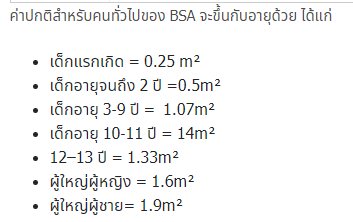

In [ ]:
def interpret_BSA_by_sex(BSA_value, sex):
    if sex == 0:  # Male
        if BSA_value == 1.9:
            return 'Normal'
        elif BSA_value < 1.9:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if BSA_value == 1.6:
            return 'Normal'
        elif BSA_value < 1.6:
            return 'Low'
        else:
            return 'High'

# Add a new column 'BSA_Interpretation' based on 'BSA' values and 'Sex'
df_selected['BSA_Interpretation'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)

<ipython-input-31-cb45dfff229e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BSA_Interpretation'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)


แหล่งที่มา : https://www.rxlist.com/body_surface_area/definition.htm

In [ ]:
df_selected[df_selected['BSA'] == 1.6][['BSA', 'BSA_Interpretation','Sex']]

,BSA,BSA_Interpretation,Sex
23,1.6,Normal,1
102,1.6,Low,0
104,1.6,Low,0
333,1.6,Normal,1
352,1.6,Low,0
...,...,...,...
52446,1.6,Low,0
52510,1.6,Normal,1
52530,1.6,Low,0
52545,1.6,Normal,1


###BMI

In [ ]:
df_selected['BMI'].min()

0.0

In [ ]:
df_selected['BMI'].max()

186879.99

In [ ]:
def interpret_BMI(BMI_value):
    if BMI_value < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI_value < 25:
        return 'Healthy weight'
    elif 25 <= BMI_value < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# เพิ่มคอลัมน์ 'bmi' ที่บอกระดับของ 'interpret_BMI'
df_selected['BMI_Interpretation'] = df_selected['BMI'].apply(interpret_BMI)

แหล่งที่มา : https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

###BUN

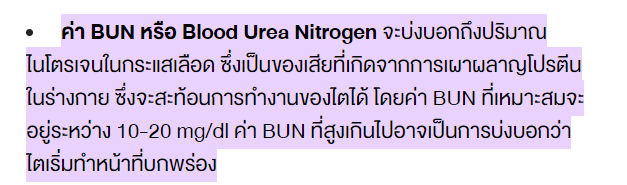

In [ ]:
df_selected['L2-BUN'].min()

0.1

In [ ]:
df_selected['L2-BUN'].max()

194.4

In [ ]:
def interpret_BUN(BUN_value):
    if BUN_value <= 20:
        return 'normal'
    else:
        return 'high'

# Add a new column 'bun_level' based on 'BUN' values
df_selected['ฺBUN'] = df_selected['L2-BUN'].apply(interpret_BUN)

แหล่งที่มา : https://hdmall.co.th/c/kidney-screening

###Creatinine

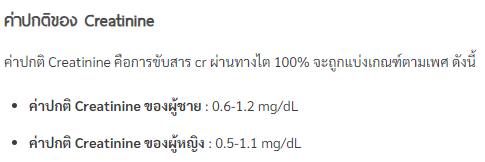

In [ ]:
df_selected['L3-Creatinine'].min()

0.22

In [ ]:
df_selected['L3-Creatinine'].max()

25.1

In [ ]:
def interpret_creatinine_by_sex(creatinine_value, sex):
    if sex == 0:  # Male
        if 0.6 <= creatinine_value <= 1.2:
            return 'Normal'
        elif creatinine_value < 0.6:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 0.5 <= creatinine_value <= 1.1:
            return 'Normal'
        elif creatinine_value < 0.5:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Creatinine_Interpretation' based on 'Creatinine' values and 'Sex'
df_selected['Creatinine'] = df_selected.apply(lambda row: interpret_creatinine_by_sex(row['L3-Creatinine'], row['Sex']), axis=1)

แหล่งที่มา : https://www.samitivejchinatown.com/th/health-article/renal-function-test

###Sodium

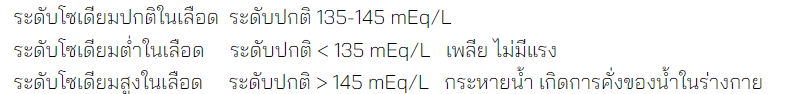

In [ ]:
def interpret_sodium(sodium_value):
    if sodium_value < 135:
        return 'Low'
    elif 135 <= sodium_value <= 145:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'sodium_level' based on 'L4-Sodium' values
df_selected['sodium'] = df_selected['L4-Sodium'].apply(interpret_sodium)

###Potassium

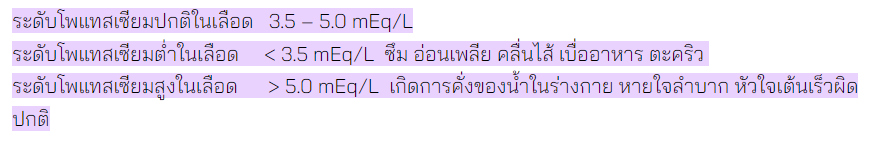

In [ ]:
def interpret_potassium(potassium_value):
    if potassium_value < 3.5:
        return 'Low'
    elif 3.5 <= potassium_value <= 5.0:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'potassium_level' based on 'L5-Potassium' values
df_selected['potassium'] = df_selected['L5-Potassium'].apply(interpret_potassium)


แหล่งที่มา : https://sriphat.med.cmu.ac.th/th/knowledge-61#:~:text=%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%20%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3&text=%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4%E0%B9%83%E0%B8%99%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%94,%E0%B8%84%E0%B8%B1%E0%B9%88%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B9%83%E0%B8%99%E0%B8%A3%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A2

###Chloride

In [ ]:
def interpret_chloride(chloride_value):
    if chloride_value < 96:
        return 'Low'
    elif 96 <= chloride_value <= 106:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'chloride_level' based on 'L6-Chloride' values
df_selected['chloride'] = df_selected['L6-Chloride'].apply(interpret_chloride)


แหล่งที่มา : https://www.mountsinai.org/health-library/tests/chloride-test-blood#:~:text=Normal%20Results,vary%20slightly%20among%20different%20laboratories.

###Bicarbonate

In [ ]:
def interpret_bicarbonate(bicarbonate_value):
    if bicarbonate_value < 22:
        return 'Low'
    elif 22 <= bicarbonate_value <= 29:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'bicarbonate_level' based on 'L7-Bicarbonate' values
df_selected['bicarbonate'] = df_selected['L7-Bicarbonate'].apply(interpret_bicarbonate)


In [ ]:
df_selected[df_selected['L7-Bicarbonate'] == 30][['L7-Bicarbonate', 'bicarbonate']]

,L7-Bicarbonate,bicarbonate
504,30.0,High
1290,30.0,High
1999,30.0,High
2042,30.0,High
3095,30.0,High
...,...,...
50050,30.0,High
51286,30.0,High
51287,30.0,High
51866,30.0,High


แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-serum-bicarbonate

###Uric

https://www.ucsfhealth.org/medical-tests/uric-acid----blood-

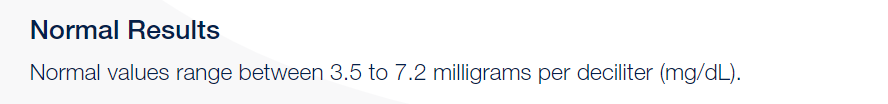

In [ ]:
def interpret_uric(uric_value):
     if uric_value < 3.5:
        return 'Low'
     elif 3.5 <= uric_value <= 7.2:
        return 'Normal'
     else:
        return 'High'

# Add a new column 'uric' based on 'L8-Uric' values
df_selected['Uric'] = df_selected['L8-Uric'].apply(interpret_uric)


<ipython-input-8-f00a34ffc506>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Uric'] = df_selected['L8-Uric'].apply(interpret_uric)


###Calcium

https://www.ucsfhealth.org/medical-tests/calcium-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

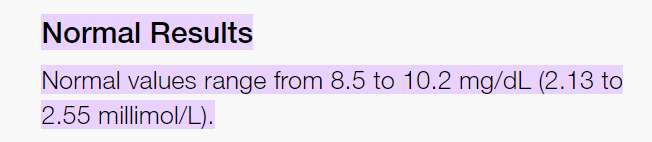

In [ ]:
def interpret_calcium(calcium_value):
    if calcium_value < 8.5:
        return 'Low'
    elif 8.5 <= calcium_value <= 10.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'calcium_level' based on 'L9-Calcium' values
df_selected['Calcium'] = df_selected['L9-Calcium'].apply(interpret_calcium)


<ipython-input-9-655cbe16bc67>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Calcium'] = df_selected['L9-Calcium'].apply(interpret_calcium)


###Phosphorus

https://www.ucsfhealth.org/medical-tests/phosphorus-blood-test

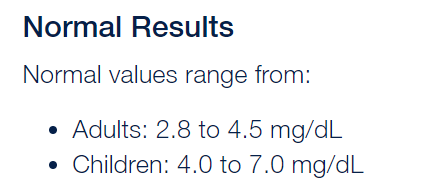

In [ ]:
def interpret_phosphorus(phosphorus_value):
    if phosphorus_value < 2.8:
        return 'Low'
    elif 2.8 <= phosphorus_value <= 4.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'phosphorus_level' based on 'L10-Phosphorus' values
df_selected['Phosphorus'] = df_selected['L10-Phosphorus'].apply(interpret_phosphorus)


<ipython-input-10-5abd9c3e3d72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Phosphorus'] = df_selected['L10-Phosphorus'].apply(interpret_phosphorus)


###Albumin

https://www.ucsfhealth.org/medical-tests/albumin-blood-(serum)-test#:~:text=The%20normal%20range%20is%203.4,vary%20slightly%20among%20different%20laboratories.

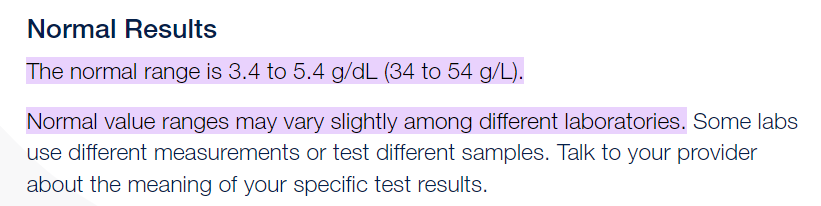

In [ ]:
def interpret_albumin(albumin_value):
    if albumin_value < 3.4:
        return 'Low'
    elif 3.4 <= albumin_value <= 5.4:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['Albumin'] = df_selected['L11-Albumin'].apply(interpret_albumin)


<ipython-input-11-62e763740954>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Albumin'] = df_selected['L11-Albumin'].apply(interpret_albumin)


###Hemoglobin

https://www.ucsfhealth.org/medical-tests/hemoglobin

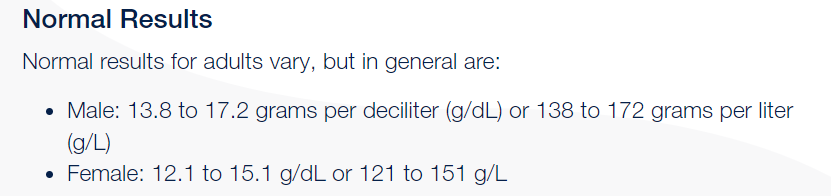

In [ ]:
def interpret_Hemoglobin_by_sex(Hemoglobin_value, sex):
    if sex == 0:  # Male
        if 13.8 <= Hemoglobin_value <= 17.2:
            return 'Normal'
        elif Hemoglobin_value < 13.8:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 12.1 <= Hemoglobin_value <= 15.1:
            return 'Normal'
        elif Hemoglobin_value < 12.1:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hemoglobinl' based on 'L12-Hemoglobin' values and 'Sex'
df_selected['Hemoglobin'] = df_selected.apply(lambda row: interpret_Hemoglobin_by_sex(row['L12-Hemoglobin'], row['Sex']), axis=1)


<ipython-input-12-59b7c6eb0a39>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Hemoglobin'] = df_selected.apply(lambda row: interpret_Hemoglobin_by_sex(row['L12-Hemoglobin'], row['Sex']), axis=1)


###Hematocrit

https://www.redcrossblood.org/donate-blood/dlp/hematocrit.html#:~:text=A%20hematocrit%20level%20below%20the,may%20indicate%20polycythemia%20or%20erythrocytosis.

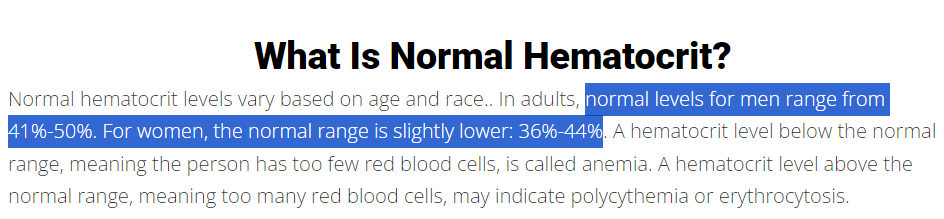

In [ ]:
def interpret_Hematocrit_by_sex(Hematocrit_value, sex):
    if sex == 0:  # Male
        if 41 <= Hematocrit_value <= 50:
            return 'Normal'
        elif Hematocrit_value < 41:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 36 <= Hematocrit_value <= 44:
            return 'Normal'
        elif Hematocrit_value < 36:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hematocrit' based on 'L13-Hematocrit' values and 'Sex'
df_selected['Hematocrit'] = df_selected.apply(lambda row: interpret_Hematocrit_by_sex(row['L13-Hematocrit'], row['Sex']), axis=1)


<ipython-input-13-f4c6fe3c95b4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Hematocrit'] = df_selected.apply(lambda row: interpret_Hematocrit_by_sex(row['L13-Hematocrit'], row['Sex']), axis=1)


###WBC

https://www.mountsinai.org/health-library/tests/wbc-count#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

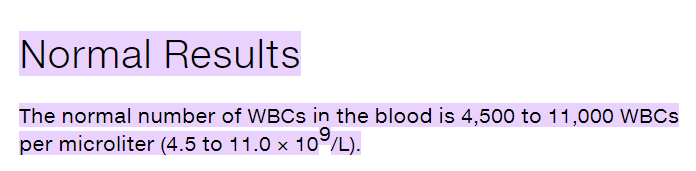

In [ ]:
def interpret_WBC(WBC_value):
    if WBC_value < 4.5:
        return 'Low'
    elif 4.5 <= WBC_value <= 11:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['WBC'] = df_selected['L14-WBC'].apply(interpret_WBC)


<ipython-input-14-fe1cfb7f4de5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['WBC'] = df_selected['L14-WBC'].apply(interpret_WBC)


###Platelet

https://www.ucsfhealth.org/medical-tests/platelet-count

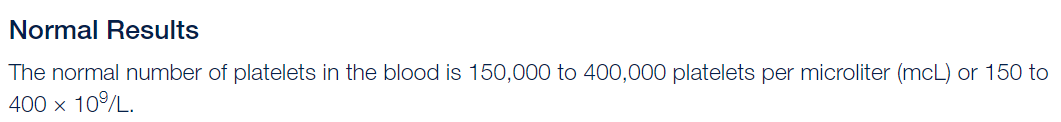

In [ ]:
def interpret_Platelet(Platelet_value):
    if Platelet_value < 150:
        return 'Low'
    elif 150 <= Platelet_value <= 400:
        return 'Normal'
    else:
        return 'High'

df_selected['Platelet'] = df_selected['L15-Platelet'].apply(interpret_Platelet)

###Blood-sugar

https://www.mountsinai.org/health-library/tests/blood-sugar-test-blood

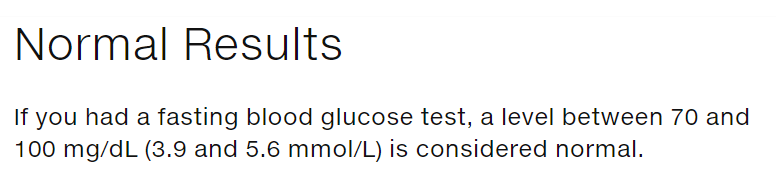

In [ ]:
def interpret_BloodSugar(BloodSugar_value):
    if BloodSugar_value < 70:
        return 'Low'
    elif 70 <= BloodSugar_value <= 100:
        return 'Normal'
    else:
        return 'High'

df_selected['Blood-Sugar'] = df_selected['L19-Blood-sugar'].apply(interpret_BloodSugar)

###HbA1c

https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/#:~:text=To%20diagnose%20diabetes%20or%20prediabetes,A1C%20of%206.5%25%20or%20higher

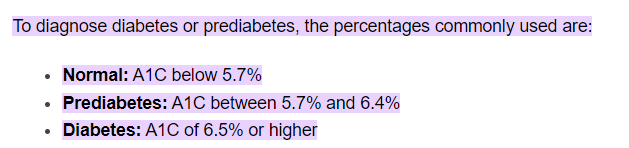

In [ ]:
def interpret_HbA1c(HbA1c_value):
    if HbA1c_value < 5.7:
        return 'Normal'
    elif 5.7 <= HbA1c_value <= 6.4:
        return 'Prediabetesl'
    else:
        return 'Diabetes'

df_selected['HbA1c'] = df_selected['L20-HbA1c'].apply(interpret_HbA1c)

###Triglyceride

https://medlineplus.gov/lab-tests/triglycerides-test/

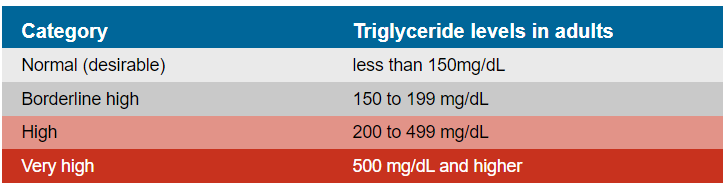

In [ ]:
def interpret_Triglyceride(Triglyceride_value):
    if Triglyceride_value < 150:
        return 'Normal'
    elif 150 <= Triglyceride_value <= 199:
        return 'Borderline high'
    elif 200 <= Triglyceride_value <= 499:
        return 'High'
    else:
        return 'Very high'

df_selected['Cholesterol'] = df_selected['L21-Cholesterol'].apply(interpret_Triglyceride)

###Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

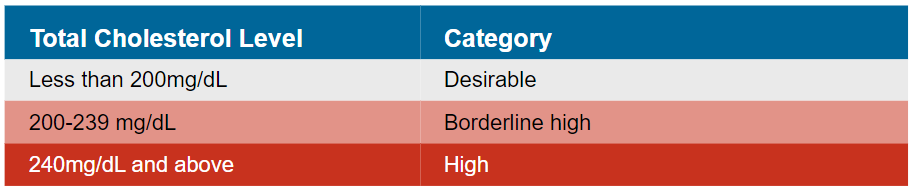

In [ ]:
def interpret_Cholesterol(Cholesterol_value):
    if Cholesterol_value < 200:
        return 'Desirable'
    elif 200 <= Cholesterol_value <= 239:
        return 'Borderline high'
    else:
        return 'High'

df_selected['Cholesterol'] = df_selected['L21-Cholesterol'].apply(interpret_Cholesterol)

###LDL-Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

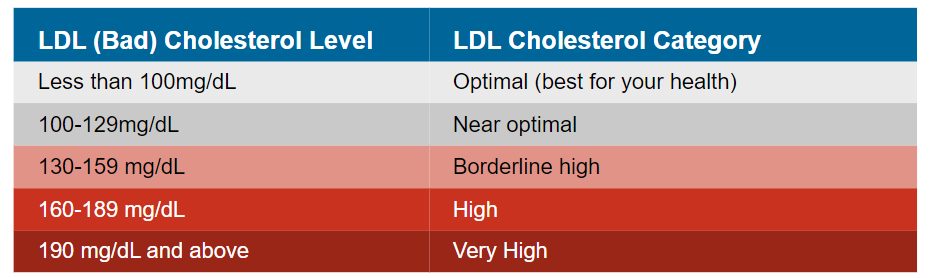

In [ ]:
def interpret_LDL(LDL_value):
    if LDL_value < 100:
        return 'Optimal'
    elif 100 <= LDL_value <= 129:
        return 'Near Optimal'
    elif 130 <= LDL_value <= 159:
        return 'Borderline High'
    elif 160 <= LDL_value <= 189:
        return 'High'
    else:
        return 'Very High'

df_selected['LDL-Cholesterol'] = df_selected['L23-LDL-Cholesterol'].apply(interpret_LDL)

###HDL-Cholesterol


https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

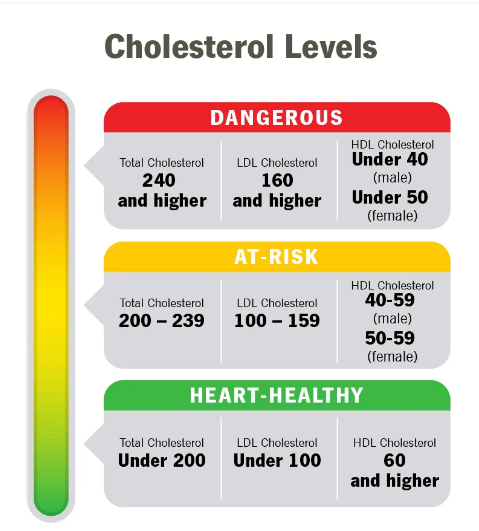

In [ ]:
def interpret_HDL_by_sex(HDL_value, sex):
    if sex == 0:  # Male
        if HDL_value < 40:
            return 'Dangerous'
        elif 40 <= HDL_value <= 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'
    elif sex == 1:  # Female
        if HDL_value <50:
            return 'Dangerous'
        elif 50<= HDL_value < 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'

df_selected['HDL-Cholesterol'] = df_selected.apply(lambda row: interpret_HDL_by_sex(row['L24-HDL-Cholesterol'], row['Sex']), axis=1)


###UrineProtein-Cr-ratio

https://www.healthline.com/health/kidney-disease/urine-protein-creatinine-ratio#levels

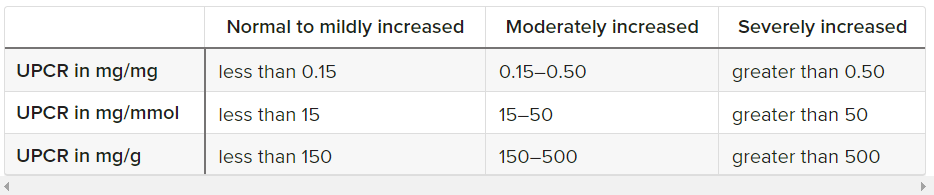

In [ ]:
def interpret_UPCR(UPCR_value):
    if UPCR_value < 0.15:
        return 'Normal'
    elif 0.15 <= UPCR_value <= 0.5:
        return 'Moderately'
    else:
        return 'Severely'

df_selected['UPCR'] = df_selected['L28-UrineProtein-Cr-ratio'].apply(interpret_UPCR)

In [ ]:
df_selected

,InPatient,OutPatient,Emergency,VisitLocation,NATNL,Slopes,eGFR_t1,Sex,Age,BMI,...,Hemoglobin,Hematocrit,WBC,Platelet,Blood-Sugar,HbA1c,Cholesterol,LDL-Cholesterol,HDL-Cholesterol,UPCR
0,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-7.158596,63.60,1,73,20.8000,...,Normal,Normal,Normal,Normal,Normal,Normal,Borderline high,Near Optimal,Heart-Healthy,Severely
1,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,5.550691,70.20,1,74,20.2700,...,Normal,Normal,Normal,Normal,Normal,Normal,Borderline high,Borderline High,Heart-Healthy,Severely
2,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-6.063710,64.02,1,75,20.7200,...,Low,Low,Normal,Normal,Normal,Normal,Desirable,Near Optimal,Heart-Healthy,Severely
3,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-12.812245,48.54,1,76,20.2700,...,Normal,Normal,Normal,Normal,Normal,Normal,Borderline high,Borderline High,Heart-Healthy,Severely
4,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,28.287500,80.47,1,78,19.0500,...,Low,Low,Normal,High,Normal,Normal,Desirable,Near Optimal,Heart-Healthy,Severely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,0,1,0,บูรณาการนอกเวลา (คลินิก)-OD191,0,-4.256753,33.68,0,63,29.7500,...,Normal,Normal,Normal,Normal,High,Prediabetesl,Desirable,Optimal,AT-Risk,Severely
52616,0,1,0,บูรณาการนอกเวลา (คลินิก)-OD191,0,-0.692078,26.47,1,71,25.9700,...,Normal,Normal,Normal,Normal,Normal,Diabetes,Desirable,Optimal,Dangerous,Severely
52617,0,0,1,OPD AE-DV191,0,7.217875,70.36,0,66,27.1124,...,Low,Low,Normal,Low,High,Diabetes,Desirable,Optimal,Dangerous,Severely
52618,0,1,0,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,0,-32.794557,30.69,0,67,27.9125,...,Low,Low,Normal,Normal,High,Diabetes,Borderline high,Borderline High,AT-Risk,Severely


### drug groups

In [ ]:
drug = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
        'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
        'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
        'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
        'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
        'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
        'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent']
drug = df[drug]

In [ ]:
drug.head()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,...,G1M9-Vasodilator,G1M8-Alpha-blocker,G2M6-Insulin,G2M4-TZD,G4M2-Febuxostat,G3M2-Ezetimibe,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G2M7-GLP1-RA,G4M3-Uricosuric-agent
0,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90,90,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,100,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,0,1,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
drug.describe()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,...,G1M9-Vasodilator,G1M8-Alpha-blocker,G2M6-Insulin,G2M4-TZD,G4M2-Febuxostat,G3M2-Ezetimibe,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G2M7-GLP1-RA,G4M3-Uricosuric-agent
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.0,52620.000000
mean,8.887628,30.067104,1.047681,2.593330,8.862657,9.167389,0.683390,6.630274,13.154257,4.558723,...,3.167256,4.171532,0.394755,2.850171,0.258989,1.769707,1.772995,0.333694,0.0,0.109787
std,27.112374,43.033413,8.089661,14.695136,26.546391,27.310031,7.339541,23.274212,32.222202,20.356311,...,16.323534,18.723921,5.260395,16.281224,4.904211,12.888611,12.106452,5.319310,0.0,3.215718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,365.000000,400.000000,200.000000,252.000000,285.000000,210.000000,195.000000,240.000000,315.000000,271.000000,...,210.000000,210.000000,210.000000,240.000000,119.000000,200.000000,210.000000,105.000000,0.0,180.000000


In [ ]:
pd.DataFrame({
    'feature': drug.columns.values,
    'n_unique': drug.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [drug[col].unique() for col in drug.columns]}
).round(3).reset_index(drop=True)

,feature,n_unique,sample_unique
0,G1M2-ARB,103,"[90, 100, 35, 0, 105, 210, 104, 42, 20, 60, 25..."
1,G3M1-Statin,154,"[0, 90, 100, 105, 42, 147, 1, 104, 85, 210, 60..."
2,G5M2-NSAIDs,63,"[0, 34, 1, 15, 14, 90, 40, 20, 3, 24, 5, 30, 7..."
3,G1M5-Diuretic,95,"[0, 35, 100, 105, 85, 24, 30, 1, 90, 60, 42, 1..."
4,G1M7-Beta-blocker,126,"[0, 90, 105, 100, 104, 85, 42, 92, 40, 18, 95,..."
5,G1M3-Dihydropyridine-CCB,107,"[0, 90, 105, 100, 210, 45, 42, 20, 95, 60, 71,..."
6,G1M6-MRA,62,"[0, 30, 16, 60, 17, 105, 80, 12, 42, 100, 90, ..."
7,G1M1-ACEI,102,"[0, 100, 90, 1, 12, 14, 105, 60, 40, 56, 30, 6..."
8,G2M2-Metformin,132,"[0, 100, 90, 1, 105, 85, 60, 4, 18, 56, 104, 4..."
9,G2M3-DPP4-inhibitor,75,"[0, 90, 6, 100, 104, 84, 105, 60, 42, 91, 95, ..."


In [ ]:
import pandas as pd

# คอลัมน์ของยาทั้งหมด
drug_columns = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
                'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
                'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
                'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
                'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
                'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
                'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent']

# สร้างคอลัมน์ใหม่สำหรับแต่ละยาที่ระบุว่าคนไข้กินหรือไม่กิน
for col in drug_columns:
    df_selected[col + '_taken'] = (df_selected[col] > 0).astype(int)

# ตัวอย่างผลลัพธ์
df_selected.head()  # แสดงข้อมูลบางส่วนของ DataFrame ที่ปรับแล้ว

,InPatient,OutPatient,Emergency,VisitLocation,NATNL,Slopes,eGFR_t1,Sex,Age,BMI,...,G1M9-Vasodilator_taken,G1M8-Alpha-blocker_taken,G2M6-Insulin_taken,G2M4-TZD_taken,G4M2-Febuxostat_taken,G3M2-Ezetimibe_taken,G1M4-Non-dihydropyridine-CCB_taken,G5M1-Ketoanalog-amino-acid_taken,G2M7-GLP1-RA_taken,G4M3-Uricosuric-agent_taken
0,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-7.158596,63.60,1,73,20.80,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,5.550691,70.20,1,74,20.27,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-6.063710,64.02,1,75,20.72,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,-12.812245,48.54,1,76,20.27,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,เวชปฏิบัติทั่วไป (OPD)-D03,0,28.287500,80.47,1,78,19.05,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_selected[['G1M2-ARB','G1M2-ARB_taken','G3M1-Statin', 'G3M1-Statin_taken',
       'G5M2-NSAIDs','G1M5-Diuretic','G5M2-NSAIDs_taken','G1M5-Diuretic', 'G1M5-Diuretic_taken']]

,G1M2-ARB,G1M2-ARB_taken,G3M1-Statin,G3M1-Statin_taken,G5M2-NSAIDs,G1M5-Diuretic,G5M2-NSAIDs_taken,G1M5-Diuretic,G1M5-Diuretic_taken
0,90,1,0,0,0,0,0,0,0
1,90,1,90,1,0,0,0,0,0
2,100,1,100,1,34,0,1,0,0
3,35,1,0,0,1,35,1,35,1
4,100,1,0,0,15,0,1,0,0
...,...,...,...,...,...,...,...,...,...
52615,100,1,100,1,0,0,0,0,0
52616,0,0,100,1,0,0,0,0,0
52617,0,0,0,0,0,0,0,0,0
52618,0,0,0,0,0,0,0,0,0


### diag groups

In [ ]:
diag = ['D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']
diag = df[diag]

In [ ]:
diag.head()

,D1-Hypertension,D2-Diabetes-mellitus,D3-Dyslipidemia,D4-SLE,D5-Systemic-sclerosis,D6-Rheumatoid-arthritis,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
diag.describe()

,D1-Hypertension,D2-Diabetes-mellitus,D3-Dyslipidemia,D4-SLE,D5-Systemic-sclerosis,D6-Rheumatoid-arthritis,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.273831,0.226606,0.196769,0.009502,0.004371,0.016838,0.002471,0.007982,0.009977,0.014994,0.005530,0.001558,0.020334,0.008837,0.043843,0.013208
std,0.528612,0.471462,0.402926,0.099529,0.066257,0.131874,0.049644,0.089410,0.099387,0.122621,0.075431,0.039445,0.144075,0.094197,0.209699,0.114664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,6.000000,7.000000,3.000000,2.000000,5.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000


In [ ]:
pd.DataFrame({
    'feature': diag.columns.values,
    'n_unique': diag.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [diag[col].unique() for col in diag.columns]}
).round(3).reset_index(drop=True)

,feature,n_unique,sample_unique
0,D1-Hypertension,5,"[0, 1, 2, 3, 4]"
1,D2-Diabetes-mellitus,6,"[2, 1, 0, 3, 4, 6]"
2,D3-Dyslipidemia,5,"[0, 1, 2, 3, 7]"
3,D4-SLE,4,"[0, 1, 2, 3]"
4,D5-Systemic-sclerosis,3,"[0, 1, 2]"
5,D6-Rheumatoid-arthritis,5,"[0, 1, 2, 5, 3]"
6,D7-HIV-infection,2,"[0, 1]"
7,D8-HBV-infection,3,"[0, 1, 2]"
8,D9-HCV-infection,2,"[0, 1]"
9,D10-Ischemic-heart-disease,3,"[0, 1, 2]"


In [ ]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
diag_columns = ['D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
                'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
                'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
                'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
                'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
                'D16-Hematologic-malignancy']

# สร้างคอลัมน์ใหม่สำหรับแต่ละการตรวจที่ระบุว่าผู้ป่วยมีการตรวจหรือไม่มีการตรวจ
for col in diag_columns:
    df_selected[col + '_check'] = (df_selected[col] > 0).astype(int)

In [ ]:
df_selected.columns

Index(['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'NATNL',
       'Slopes', 'eGFR_t1', 'Sex', 'Age', 'BMI',
       ...
       'D7-HIV-infection_check', 'D8-HBV-infection_check',
       'D9-HCV-infection_check', 'D10-Ischemic-heart-disease_check',
       'D11-Heart-failure_check', 'D12-Thalassemia_check',
       'D13-Kidney-stone_check', 'D14-Valvular-heart-disease_check',
       'D15-Solid-malignancy_check', 'D16-Hematologic-malignancy_check'],
      dtype='object', length=115)

In [ ]:
df_selected[['D1-Hypertension','D1-Hypertension_check', 'D2-Diabetes-mellitus','D2-Diabetes-mellitus_check','D3-Dyslipidemia','D3-Dyslipidemia_check',
             'D6-Rheumatoid-arthritis','D6-Rheumatoid-arthritis_check']]

,D1-Hypertension,D1-Hypertension_check,D2-Diabetes-mellitus,D2-Diabetes-mellitus_check,D3-Dyslipidemia,D3-Dyslipidemia_check,D6-Rheumatoid-arthritis,D6-Rheumatoid-arthritis_check
0,0,0,2,1,0,0,0,0
1,0,0,2,1,1,1,0,0
2,0,0,1,1,1,1,0,0
3,0,0,1,1,1,1,0,0
4,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...
52615,1,1,0,0,0,0,0,0
52616,1,1,0,0,0,0,0,0
52617,0,0,1,1,0,0,0,0
52618,0,0,0,0,0,0,0,0


## Association Rule